In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation # LSTM -> 기억을 가지고 있다.
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

Using TensorFlow backend.


In [2]:
path = '/Users/hankiho/Desktop/네이버_과제/DSC2019_예선_데이터/'

In [3]:
st_data_koreaIndex = pd.read_csv(path + 'st_data_koreaIndex.tsv', delimiter='\t', header=0)
#st_data_itemChargeFull = pd.read_csv(path + 'st_data_itemChargeFull.tsv', delimiter='\t', header=0)
st_data_foreignCharge = pd.read_csv(path + 'st_data_foreignCharge.tsv', delimiter='\t', header=0)
st_data_exchange = pd.read_csv(path + 'st_data_exchange.tsv', delimiter='\t', header=0)
st_data_oilKorea = pd.read_csv(path + 'st_data_oilKorea.tsv', delimiter='\t', header=0)
st_data_goldKorea = pd.read_csv(path + 'st_data_goldKorea.tsv', delimiter='\t', header=0)
st_data_oilForeign = pd.read_csv(path + 'st_data_oilForeign.tsv', delimiter='\t', header=0)
st_data_goldForeign = pd.read_csv(path + 'st_data_goldForeign.tsv', delimiter='\t', header=0)
st_data_goodsForeign = pd.read_csv(path + 'st_data_goodsForeign.tsv', delimiter='\t', header=0)

In [4]:
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

TypeError: matrix() got an unexpected keyword argument 'ax'

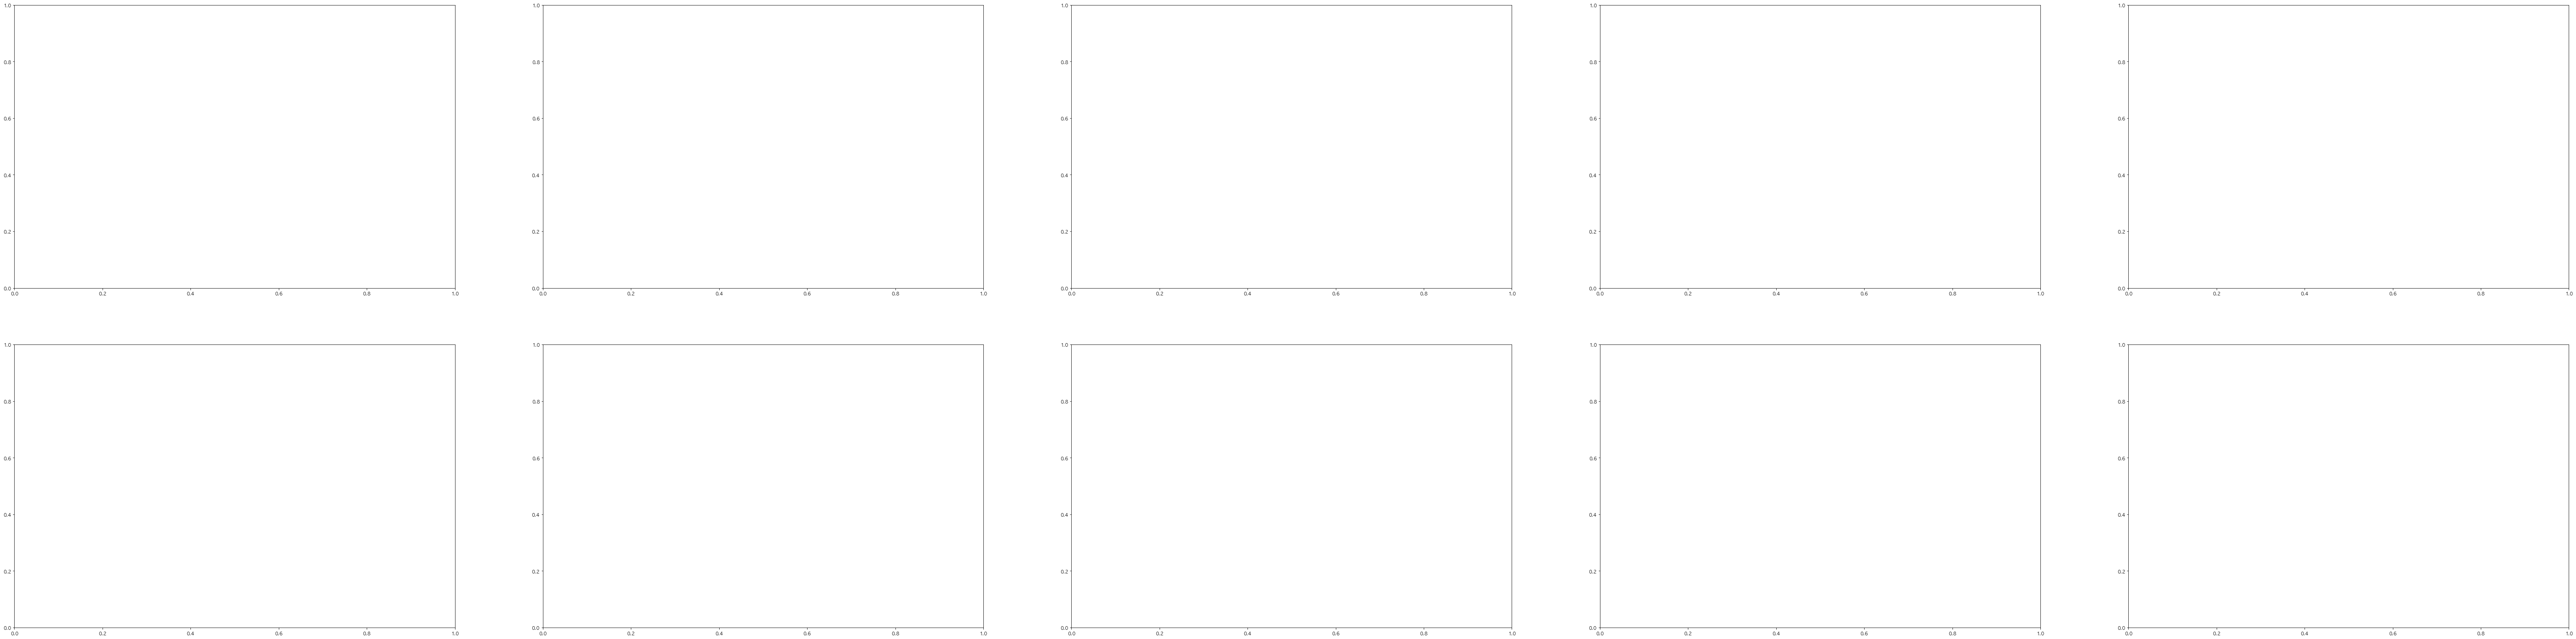

In [5]:
fig, ax = plt.subplots(2,5,figsize = (100,25))

msno.matrix(st_data_exchange.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[0,0])
msno.matrix(st_data_foreignChargeiloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[0,1])
msno.matrix(st_data_goldForeign.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[0,2])
msno.matrix(st_data_goldKorea.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[0,3])
msno.matrix(st_data_goodsForeign.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[0,4])
msno.matrix(st_data_itemChargeFull.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[1,0])
msno.matrix(st_data_koreaIndex.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[1,1])
msno.matrix(st_data_oilForeign.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[1,2])
msno.matrix(st_data_oilKorea.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = ax[1,3])

In [7]:
def feature_each_count(df):
    for i in df.columns:
        print(i + " : " + str(len(df[i].value_counts())))  

In [8]:
def eda(df):
    print (feature_each_count(df))
    print ('---------')
    print (df.shape)
    print ('---------')
    print (df.isnull().sum())

In [9]:
dt = st_data_exchange[(st_data_exchange['itemname2'] == '일본JPY (100엔)') |
                (st_data_exchange['itemname2'] == '홍콩HKD') |
                (st_data_exchange['itemname2'] == '태국THB') |
                (st_data_exchange['itemname2'] == '대만TWD') |
                (st_data_exchange['itemname2'] == '미국USD') |
                (st_data_exchange['itemname2'] == '필리핀PHP') |
                (st_data_exchange['itemname2'] == '베트남VND 100')]

In [10]:
dt = dt[['date', 'cash_buying_val', 'itemname2']]
dt.head(2)

,date,cash_buying_val,itemname2
4844,20150107,144.61,홍콩HKD
4845,20150113,142.49,홍콩HKD


In [11]:
# https://rfriend.tistory.com/278 데이터 재구조화
dt_exchange = dt.pivot(index = 'date',
                       columns = 'itemname2',
                       values = 'cash_buying_val')
dt_exchange.head()

itemname2,대만TWD,미국USD,베트남VND 100,일본JPY (100엔),태국THB,필리핀PHP,홍콩HKD
date,,,,,,,
20150107,37.15,1118.74,5.74,939.80,35.42,26.86,144.61
20150113,36.75,1102.15,5.67,931.89,34.94,26.62,142.49
20150116,36.89,1096.35,5.65,939.30,35.02,26.54,141.74
20150119,36.99,1097.47,5.65,936.00,35.08,26.63,141.92
20150122,37.29,1103.68,5.67,936.43,35.26,26.98,142.71


In [12]:
da = st_data_koreaIndex[['date','itemcode','close_val']]
da.head(5)

,date,itemcode,close_val
0,20150107,KOSDAQ,56132
1,20150113,KOSDAQ,57100
2,20150116,KOSDAQ,57741
3,20150119,KOSDAQ,57794
4,20150122,KOSDAQ,57842


In [13]:
dt_koreaindex = da.pivot(index = 'date',
                        columns = 'itemcode',
                        values = 'close_val')
dt_koreaindex.head(5)

itemcode,KOSDAQ,KOSPI,KPI200
date,,,
20150107,56132,188383,24053
20150113,57100,191714,24629
20150116,57741,188813,24222
20150119,57794,190262,24478
20150122,57842,192082,24847


In [14]:
db = st_data_foreignCharge[(st_data_foreignCharge['country_name'] == '일본') |
                      (st_data_foreignCharge['country_name'] == '홍콩') |
                      (st_data_foreignCharge['country_name'] == '대만') |
                      (st_data_foreignCharge['country_name'] == '미국') |
                      (st_data_foreignCharge['country_name'] == '베트남')]
db = db[['date','close_val','country_name']]
db.head(4)

,date,close_val,country_name
1930,20150107,9080.09,대만
1931,20150113,9231.80,대만
1932,20150116,9138.29,대만
1933,20150119,9174.06,대만


In [15]:
#pivot이 안되면 pivot_table로 해결 -> 이유는 나도 모름
dt_foreignindex = db.pivot_table(index = 'date',
                        columns = 'country_name',
                        values = 'close_val')
dt_foreignindex.head(5)

country_name,대만,미국,베트남,일본,홍콩
date,,,,,
20150107,9080.09,6309.756667,84.18,16885.33,13364.813333
20150113,9231.80,6315.888333,85.18,17087.71,13596.970000
20150116,9138.29,6289.248333,85.35,16864.16,13559.026667
20150119,9174.06,NaN,85.26,17014.29,13212.643333
20150122,9369.51,6453.981667,85.66,17329.02,13711.913333


In [33]:
dt_oilkorea = st_data_oilKorea[['date','close_val']]
dt_oilkorea.head()

,date,close_val
0,20150101,1586.62
1,20150104,1576.56
2,20150107,1563.16
3,20150110,1546.58
4,20150113,1531.03


In [34]:
dt_goldkorea = st_data_goldKorea[['date','sell_val','international_val']]
dt_goldkorea.head()

,date,sell_val,international_val
0,20150107,40886.06,1214.85
1,20150113,41112.99,1242.45
2,20150116,41413.58,1257.92
3,20150119,42031.36,1275.50
4,20150122,42669.34,1287.70


In [35]:
db = st_data_oilForeign[['date','itemname','close_val']]
dt_oilForeign = db.pivot(index = 'date',
                        columns = 'itemname',
                        values = 'close_val')
dt_oilForeign.head(5)

itemname,WTI(서부텍사스유),두바이유,브렌트유
date,,,
20150107,48.65,48.23,51.15
20150113,45.89,45.35,46.59
20150116,48.69,46.11,50.17
20150119,47.52,NaN,48.84
20150122,46.31,45.39,48.52


In [36]:
dg = st_data_goldForeign[['date','itemname','close_val']]
dt_goldForeign = dg.pivot(index = 'date',
                         columns = 'itemname',
                         values = 'close_val')
dt_goldForeign.head(5)

itemname,국제 금,백금,은,팔라듐
date,,,,
20150107,1210.6,1220.7,16.510,792.4
20150113,1234.3,1247.4,17.125,815.7
20150116,1276.9,1269.8,17.739,754.3
20150119,1276.6,1264.0,17.770,791.5
20150122,1300.7,1284.0,18.346,773.6


In [37]:
dz = st_data_goodsForeign[['date','itemname','close_val']]
dt_goodsForeign = dg.pivot(index = 'date',
                         columns = 'itemname',
                         values = 'close_val')
dt_goodsForeign.head(5)

itemname,국제 금,백금,은,팔라듐
date,,,,
20150107,1210.6,1220.7,16.510,792.4
20150113,1234.3,1247.4,17.125,815.7
20150116,1276.9,1269.8,17.739,754.3
20150119,1276.6,1264.0,17.770,791.5
20150122,1300.7,1284.0,18.346,773.6


In [38]:
dt_goodsForeign = dt_goodsForeign['국제 금'].fillna(dt_goodsForeign['국제 금'].mean())
gold = np.array(dt_goodsForeign)

In [39]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(gold) - sequence_length):
    result.append(gold[index: index + sequence_length])

In [40]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

In [41]:
row = int(round(result.shape[0] * 0.7))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((198, 50, 1), (85, 50, 1))

In [42]:
model = Sequential() #Sequential모델

model.add(LSTM(50, return_sequences = True, input_shape = (50, 1))) #input를 맞쳐줘야된다

model.add(LSTM(64, return_sequences = False))

model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'rmsprop') #손실함수와 옵티마이저

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train, y_train,
    validation_data = (x_test, y_test),
    batch_size = 10,
    epochs = 50)

Instructions for updating:
Use tf.cast instead.
Train on 198 samples, validate on 85 samples
Epoch 1/50
198/198 [==============================] - 4s 19ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0015 - val_loss: 5.0443e-04
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 8.1229e-04
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0011 - val_loss: 5.4893e-04
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 9.1972e-04 - val_loss: 3.5363e-04
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 8.4126e-04 - val_loss: 2.8008e-04
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 7.8267e-04 - val_loss: 2.9338e-04
Epoch 8/50
198/198 [==============================] - 2s 11ms/step - loss: 7.6653e-04 - val_loss: 9.3317e-04
Epoch 9/50
198/198 [==============================] - 2

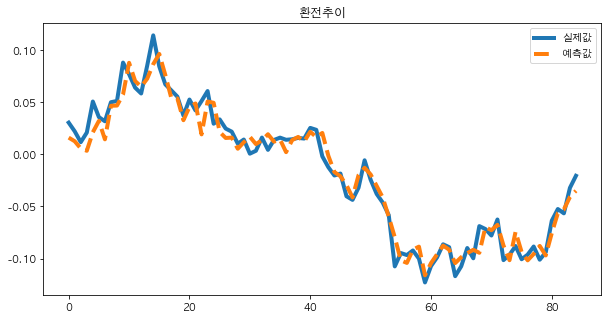

In [44]:
pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white', figsize = (10, 5))
ax = fig.add_subplot(111)
ax.plot(y_test, label = '실제값', linewidth = 4)
ax.plot(pred, label = '예측값', linewidth = 4, linestyle = '--')
ax.legend()
plt.rcParams['axes.grid'] = True
plt.title('환전추이')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print("Test Accuracy is ", accuracy_score(y_test, pred)*100)

ValueError: continuous is not supported

In [48]:
accuracy_score(y_test,pred)

ValueError: continuous is not supported